### Imports

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [32]:
df = pd.read_csv("data.csv", index_col=0, parse_dates=True)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2017-01-01,998.325012,1003.080017,958.698975,963.658020,147775008
2017-01-02,1021.750000,1031.390015,996.702026,998.617004,222184992
2017-01-03,1043.839966,1044.079956,1021.599976,1021.599976,185168000
2017-01-04,1154.729980,1159.420044,1044.400024,1044.400024,344945984
2017-01-05,1013.380005,1191.099976,910.416992,1156.729980,510199008


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3183 entries, 2017-01-01 to 2025-09-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3183 non-null   float64
 1   High    3183 non-null   float64
 2   Low     3183 non-null   float64
 3   Open    3183 non-null   float64
 4   Volume  3183 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 149.2 KB


In [34]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

### Feature engineering

In [35]:
df.asfreq("B")
df = df.ffill()

In [36]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [37]:
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))
df["SMA_short"] = df["Close"].rolling(window=20).mean()
df["SMA_long"] = df["Close"].rolling(window=50).mean()
df["volatility"] = df["log_return"].rolling(window=20).std()
df["open_close_ratio"] = df["Open"] / df["Close"]
df["high_low_range"] = (df["High"] - df["Low"]) / df["Close"]
df["volume_zscore"] = (df["Volume"] - df["Volume"].rolling(20).mean()) / df[
    "Volume"
].rolling(20).std()

In [38]:
df.isnull().sum()

Close                0
High                 0
Low                  0
Open                 0
Volume               0
log_return           1
SMA_short           19
SMA_long            49
volatility          20
open_close_ratio     0
high_low_range       0
volume_zscore       19
dtype: int64

In [39]:
df.shape

(3183, 12)

In [40]:
df.dropna(inplace=True)

In [41]:
df.shape

(3134, 12)

### Visualization

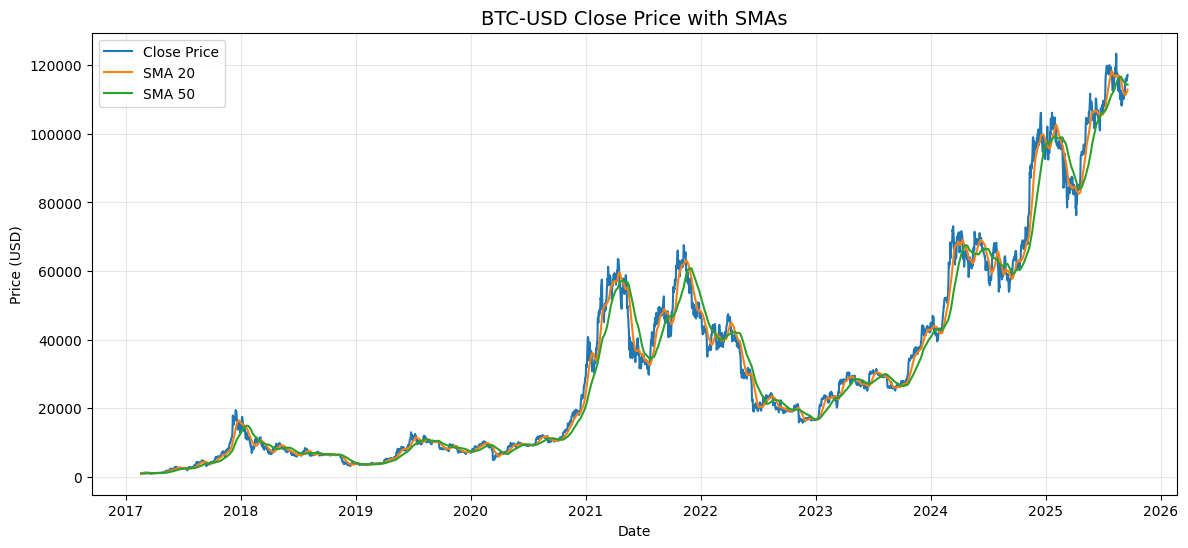

In [42]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Close"], label="Close Price", linewidth=1.5)
plt.plot(df.index, df["SMA_short"], label=f"SMA 20")
plt.plot(df.index, df["SMA_long"], label=f"SMA 50")
plt.title("BTC-USD Close Price with SMAs", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

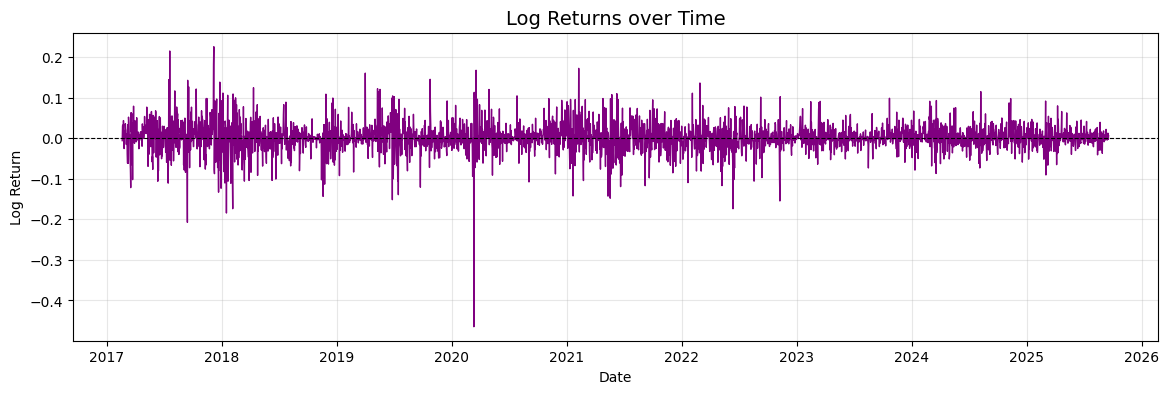

In [43]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["log_return"], color="purple", linewidth=1)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Log Returns over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(alpha=0.3)
plt.show()

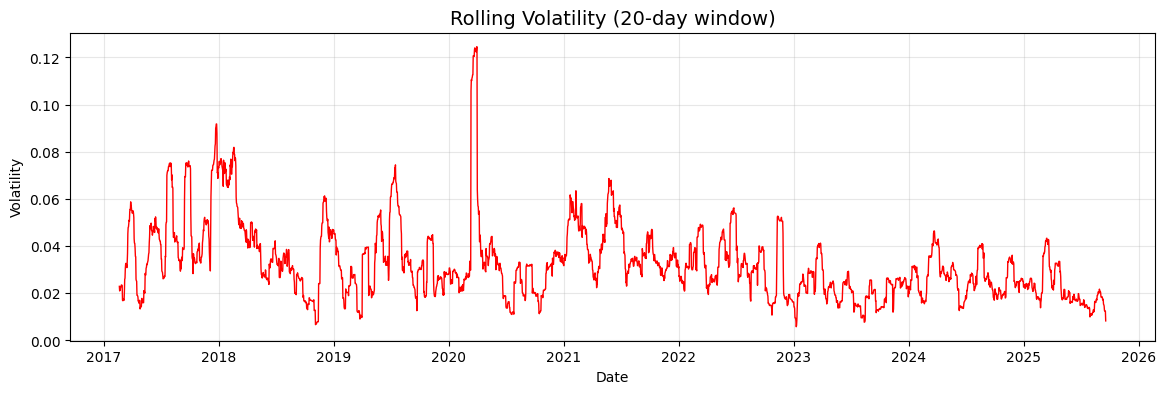

In [44]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["volatility"], color="red", linewidth=1)
plt.title(f"Rolling Volatility (20-day window)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(alpha=0.3)
plt.show()

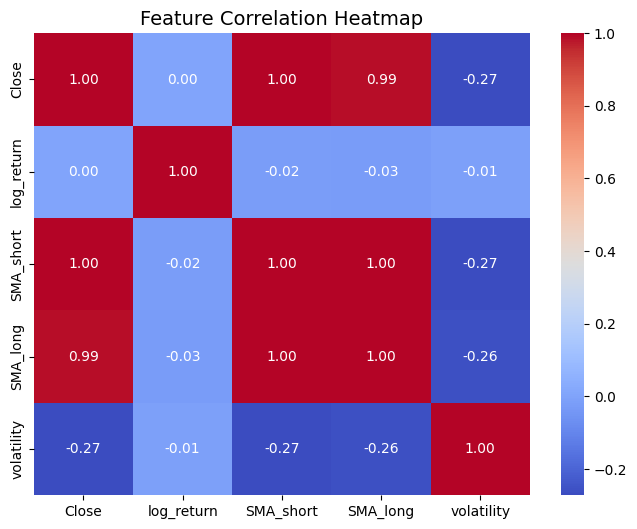

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[["Close", "log_return", "SMA_short", "SMA_long", "volatility"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

In [46]:
df.to_csv("data.csv", index=True)